### Time Series - Exponential Smoothing

1. Forecast monthly electricity consumption data with the help of exponential smoothing techniques.


### Steps used in this Algorithm:-

1.  Import all the necessary libraries

2.  Create Another Sample Time Series Dataset

3.  Visualize the Time Series

4.  Simple Exponential Smoothing (SES)

5.  Holt’s Linear Trend Method

6.  Holt-Winters Method

7.  Forecast Future Values

8.  Plot Forecasts

### Step 1: Import all the necessary libraries

In [390]:
import numpy  as  np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn           as sns

from   statsmodels.tsa.holtwinters import(
    SimpleExpSmoothing                   ,
    ExponentialSmoothing
)

### Step 2: Create Another Sample Time Series Dataset

In [391]:
# Create monthly date range
date_range = pd.date_range(start="2019-01", end="2024-12", freq="M")

# Generate synthetic electricity consumption data
np.random.seed(100)
consumption = (
    500
    + 50 * np.sin(2 * np.pi * np.arange(len(date_range)) / 12)  # seasonality
    + np.arange(len(date_range)) * 2                              # trend
    + np.random.normal(0, 15, len(date_range))                    # noise
)

# Create DataFrame
df = pd.DataFrame({
    "Date": date_range,
    "Consumption": consumption
})

df

C:\Users\parag.pujari\AppData\Local\Temp\ipykernel_16696\124036090.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="2019-01", end="2024-12", freq="M")


,Date,Consumption
0,2019-01-31,473.753518
1,2019-02-28,532.140206
2,2019-03-31,564.596807
3,2019-04-30,552.213459
4,2019-05-31,566.021082
...,...,...
66,2024-07-31,641.195583
67,2024-08-31,620.043078
68,2024-09-30,608.102551
69,2024-10-31,566.517141


In [392]:
### Set the Date column as index

df.set_index("Date", inplace = True)

In [393]:
df

,Consumption
Date,
2019-01-31,473.753518
2019-02-28,532.140206
2019-03-31,564.596807
2019-04-30,552.213459
2019-05-31,566.021082
...,...
2024-07-31,641.195583
2024-08-31,620.043078
2024-09-30,608.102551


In [394]:
### Arrange all the electricity consumption in creasing order of Dates

df.sort_values(by='Date')

,Consumption
Date,
2019-01-31,473.753518
2019-02-28,532.140206
2019-03-31,564.596807
2019-04-30,552.213459
2019-05-31,566.021082
...,...
2024-07-31,641.195583
2024-08-31,620.043078
2024-09-30,608.102551


### OBSERVATIONS:

1. The above dataset shows the total electicity consumption occured at the last date of every month.

### Step 3: Visualize the Time Series

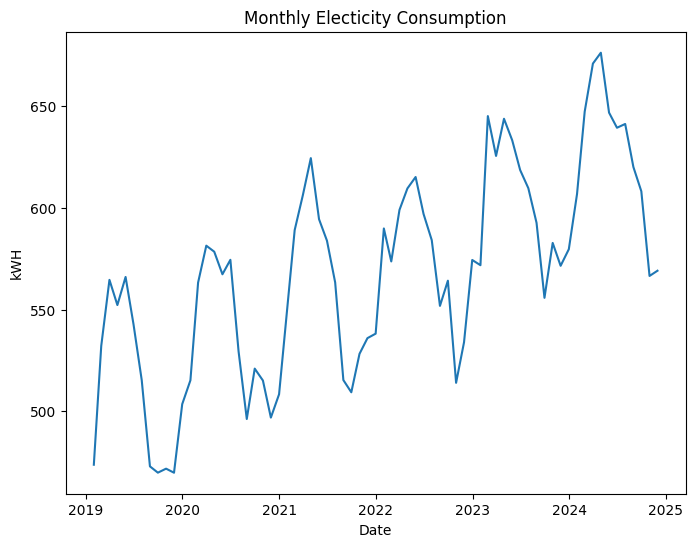

In [395]:
plt.figure(figsize=(8,6))

plt.plot(df['Consumption'], label='Consumption')
plt.title('Monthly Electicity Consumption')
plt.xlabel('Date')
plt.ylabel('kWH')
plt.show()

### OBSERVATIONS:

1. The above graph depicts about the increase in the electicity consumption occuring every year.

### Step 4: Simple Exponential Smoothing 


Simple Exponential Smoothing is a technique that is used when there is no trend and no seasonality.

In [396]:
df

,Consumption
Date,
2019-01-31,473.753518
2019-02-28,532.140206
2019-03-31,564.596807
2019-04-30,552.213459
2019-05-31,566.021082
...,...
2024-07-31,641.195583
2024-08-31,620.043078
2024-09-30,608.102551


In [397]:
### Create an object for Simple Exponential Smoothing

ses_model = SimpleExpSmoothing(df['Consumption'])

C:\Users\parag.pujari\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [398]:
### Fit and train the model

ses_train_model = ses_model.fit(smoothing_level=0.25)


### predict the model

df['SES_pred'] = ses_train_model.fittedvalues

C:\Users\parag.pujari\AppData\Roaming\Python\Python313\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [399]:
df

,Consumption,SES_pred
Date,,
2019-01-31,473.753518,473.753518
2019-02-28,532.140206,473.753518
2019-03-31,564.596807,488.350190
2019-04-30,552.213459,507.411844
2019-05-31,566.021082,518.612248
...,...,...
2024-07-31,641.195583,638.266856
2024-08-31,620.043078,638.999038
2024-09-30,608.102551,634.260048


### Step 5:  Holt’s Linear Trend Method

 Holt’s Linear Trend  is a time series forecasting technique that is used when there is trend but no seasonality.

In [400]:
### Create an object for Holt's Linear trend

holtz_obj = ExponentialSmoothing(
    df['Consumption']               ,
    trend    =     'add'            ,
    seasonal     =  None
)

C:\Users\parag.pujari\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [401]:
### train the model

holtz_linear_model = holtz_obj.fit()

In [402]:
#### predict the model

df['holtz_linear_pred'] = holtz_linear_model.fittedvalues

In [403]:
df

,Consumption,SES_pred,holtz_linear_pred
Date,,,
2019-01-31,473.753518,473.753518,473.753450
2019-02-28,532.140206,473.753518,475.115331
2019-03-31,564.596807,488.350190,533.502018
2019-04-30,552.213459,507.411844,565.958620
2019-05-31,566.021082,518.612248,553.575273
...,...,...,...
2024-07-31,641.195583,638.266856,640.698665
2024-08-31,620.043078,638.999038,642.557397
2024-09-30,608.102551,634.260048,621.404892


### Step 6: Holt-Winters Method

 Holt-Winters is a time series forecasting technique that is used when there is both trend and seasonality.

In [404]:
holtz_winter_obj = ExponentialSmoothing(
    df['Consumption']                  ,
    trend = 'add'                      ,
    seasonal = 'add'                   ,
    seasonal_periods = 12
)

C:\Users\parag.pujari\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [405]:
### train the model

holtz_winter_train_data = holtz_winter_obj.fit()

In [406]:
### predict the model

df['holtz_winter_pred'] = holtz_winter_train_data.fittedvalues

In [407]:
df

,Consumption,SES_pred,holtz_linear_pred,holtz_winter_pred
Date,,,,
2019-01-31,473.753518,473.753518,473.753450,495.771000
2019-02-28,532.140206,473.753518,475.115331,536.145503
2019-03-31,564.596807,488.350190,533.502018,552.333867
2019-04-30,552.213459,507.411844,565.958620,558.495293
2019-05-31,566.021082,518.612248,553.575273,548.215001
...,...,...,...,...
2024-07-31,641.195583,638.266856,640.698665,629.432136
2024-08-31,620.043078,638.999038,642.557397,597.094421
2024-09-30,608.102551,634.260048,621.404892,593.635052


### Step 7: Forecast Future Values

In [408]:
forecast_steps = 12

ses_forecast = ses_train_model.forecast(forecast_steps)

print(ses_forecast)

2024-12-31    601.585069
2025-01-31    601.585069
2025-02-28    601.585069
2025-03-31    601.585069
2025-04-30    601.585069
2025-05-31    601.585069
2025-06-30    601.585069
2025-07-31    601.585069
2025-08-31    601.585069
2025-09-30    601.585069
2025-10-31    601.585069
2025-11-30    601.585069
Freq: ME, dtype: float64


In [409]:
holtz_linear_forecast = holtz_linear_model.forecast(forecast_steps)

print(holtz_linear_forecast)

2024-12-31    570.442719
2025-01-31    571.804532
2025-02-28    573.166345
2025-03-31    574.528158
2025-04-30    575.889972
2025-05-31    577.251785
2025-06-30    578.613598
2025-07-31    579.975412
2025-08-31    581.337225
2025-09-30    582.699038
2025-10-31    584.060851
2025-11-30    585.422665
Freq: ME, dtype: float64


In [410]:
holtz_winter_forecast = holtz_winter_train_data.forecast(forecast_steps)

print(holtz_winter_forecast)

2024-12-31    607.534195
2025-01-31    629.202613
2025-02-28    669.577116
2025-03-31    685.765480
2025-04-30    691.926906
2025-05-31    681.646614
2025-06-30    670.482718
2025-07-31    651.670739
2025-08-31    619.333023
2025-09-30    615.873654
2025-10-31    607.572833
2025-11-30    607.367893
Freq: ME, dtype: float64


### Step 8: Plot Forecasts

In [411]:
df

,Consumption,SES_pred,holtz_linear_pred,holtz_winter_pred
Date,,,,
2019-01-31,473.753518,473.753518,473.753450,495.771000
2019-02-28,532.140206,473.753518,475.115331,536.145503
2019-03-31,564.596807,488.350190,533.502018,552.333867
2019-04-30,552.213459,507.411844,565.958620,558.495293
2019-05-31,566.021082,518.612248,553.575273,548.215001
...,...,...,...,...
2024-07-31,641.195583,638.266856,640.698665,629.432136
2024-08-31,620.043078,638.999038,642.557397,597.094421
2024-09-30,608.102551,634.260048,621.404892,593.635052


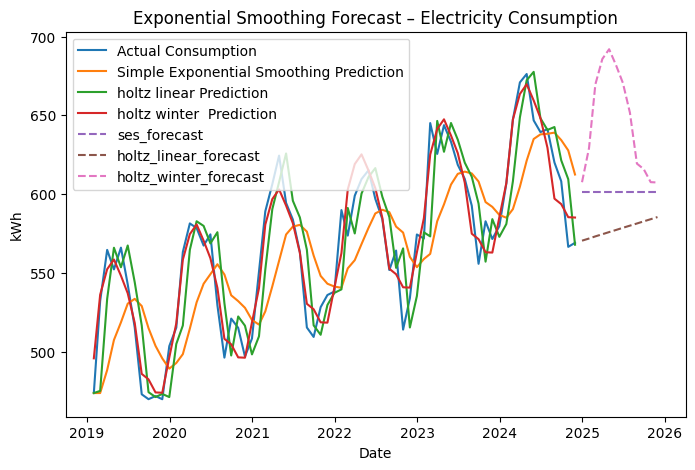

In [412]:
plt.figure(figsize=(8,5))

plt.plot(df['Consumption']      ,      label = 'Actual Consumption')
plt.plot(df['SES_pred']         ,      label = 'Simple Exponential Smoothing Prediction')
plt.plot(df['holtz_linear_pred'],      label = 'holtz linear Prediction')
plt.plot(df['holtz_winter_pred'],      label = 'holtz winter  Prediction')


plt.plot(ses_forecast,      label = 'ses_forecast', linestyle = '--')
plt.plot(holtz_linear_forecast,      label = 'holtz_linear_forecast', linestyle = '--')
plt.plot(holtz_winter_forecast,      label = 'holtz_winter_forecast', linestyle = '--')


plt.title("Exponential Smoothing Forecast – Electricity Consumption")
plt.xlabel("Date")
plt.ylabel("kWh")
plt.legend()
plt.show()

### OBSERVATIONS:

1.  The abobe graph depicts about the various forecast methods of Exponential Smoothing Forecast of electicity consumption in every month per year.

2. As the year increases, the electricity consumption also increases.